In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.cluster import KMeans 

In [2]:
data_df=pd.read_csv('bank_marketing_part1_Data-1.csv')

In [3]:
data_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [4]:
data_df.shape

(210, 7)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
data_df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [7]:
data_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
data_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
data_df.duplicated().sum()

0

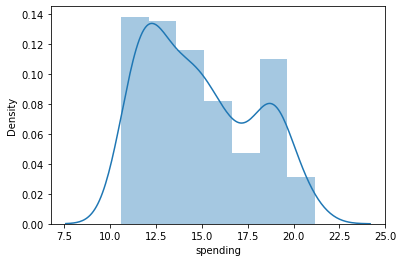

In [10]:
sns.distplot(data_df['spending']);

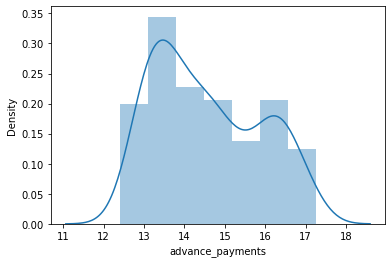

In [11]:
sns.distplot(data_df['advance_payments']);

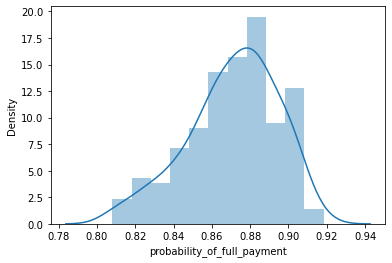

In [12]:
sns.distplot(data_df['probability_of_full_payment']);

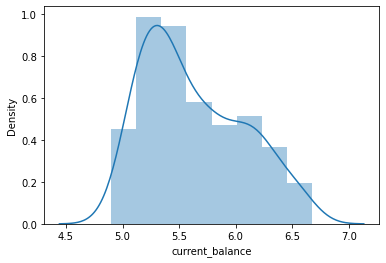

In [13]:
sns.distplot(data_df['current_balance']);

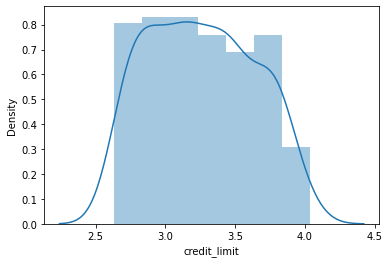

In [14]:
sns.distplot(data_df['credit_limit']);

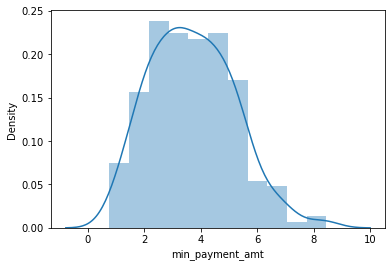

In [15]:
sns.distplot(data_df['min_payment_amt']);

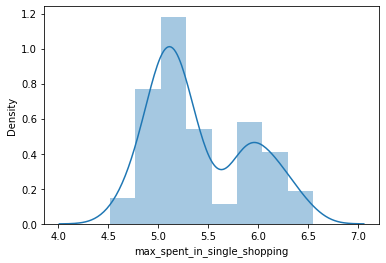

In [16]:
sns.distplot(data_df['max_spent_in_single_shopping']);

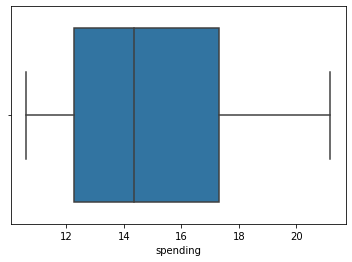

In [17]:
sns.boxplot(data_df['spending']);

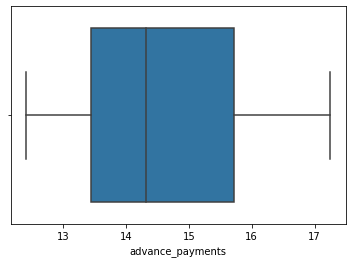

In [18]:
sns.boxplot(data_df['advance_payments']);

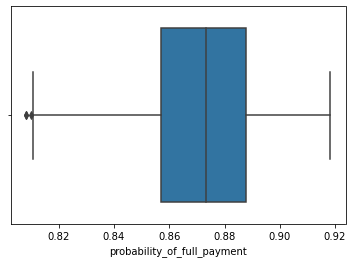

In [19]:
sns.boxplot(data_df['probability_of_full_payment']);

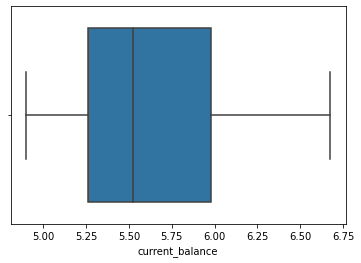

In [20]:
sns.boxplot(data_df['current_balance']);

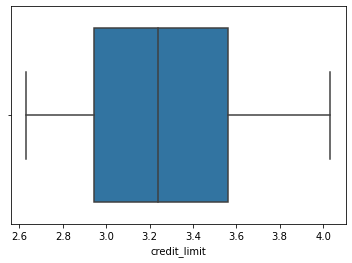

In [21]:
sns.boxplot(data_df['credit_limit']);

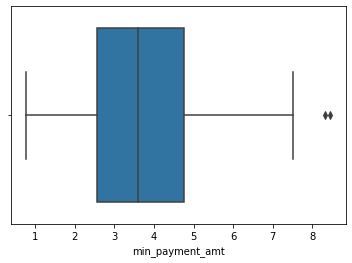

In [22]:
sns.boxplot(data_df['min_payment_amt']);

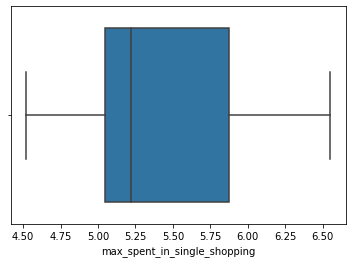

In [23]:
sns.boxplot(data_df['max_spent_in_single_shopping']);

In [24]:
data_df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [25]:
data_df.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64

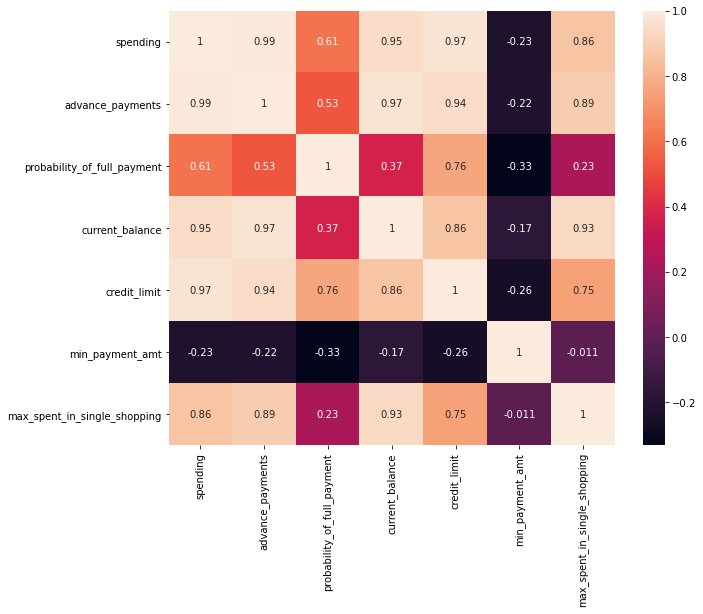

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(data_df.corr(),annot=True);

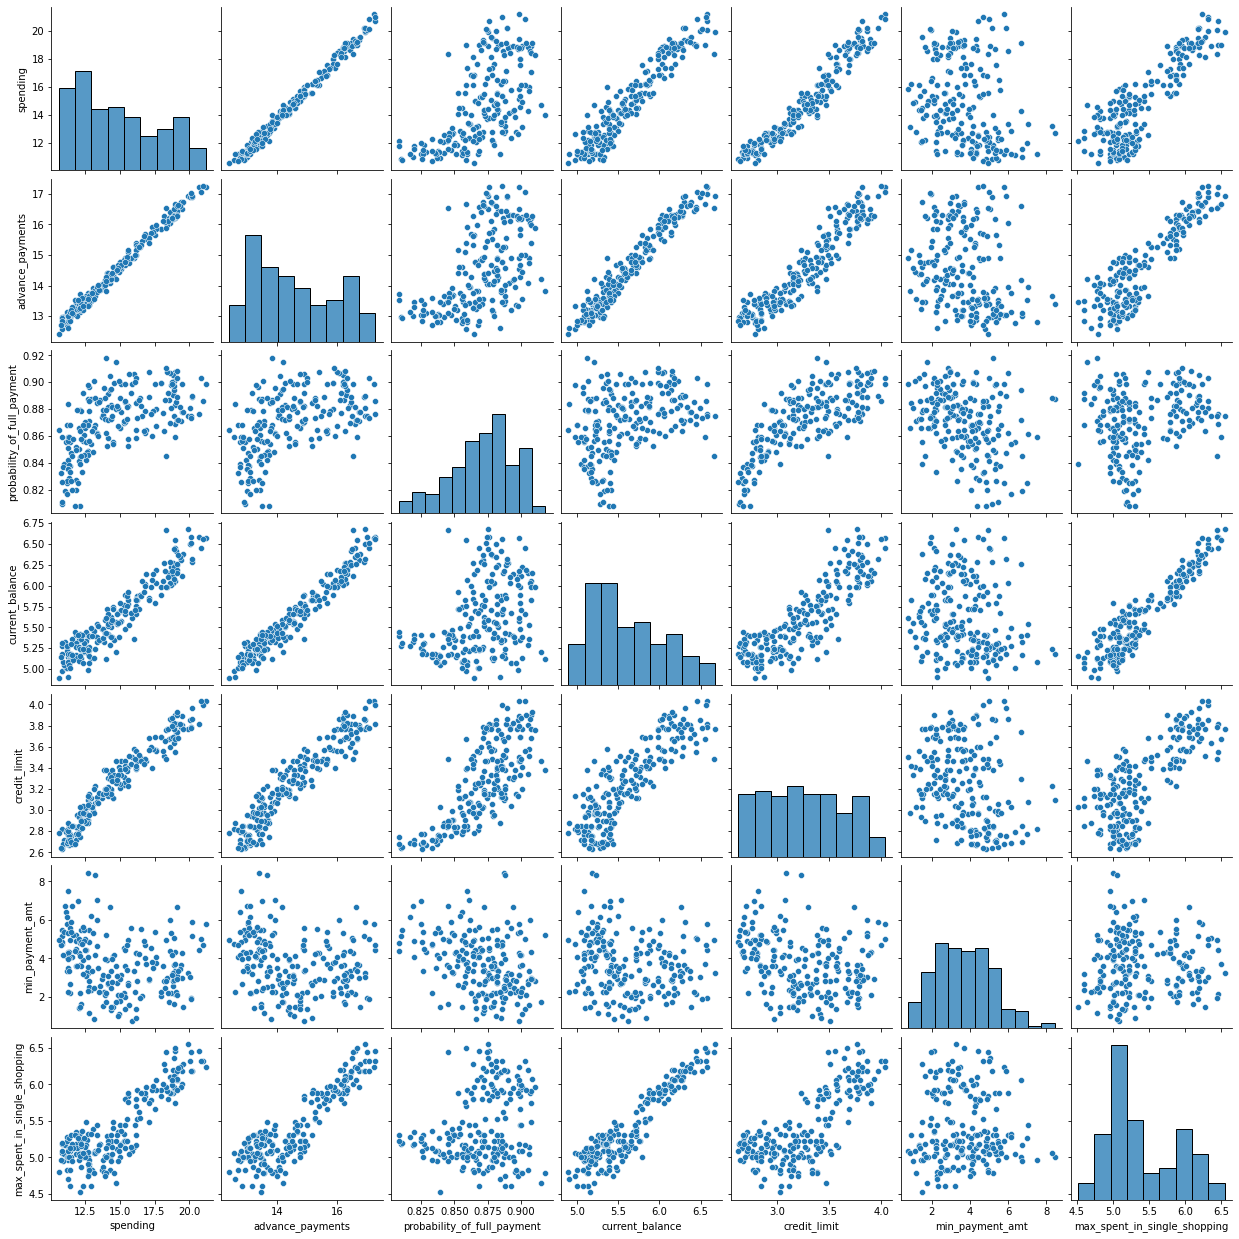

In [27]:
sns.pairplot(data_df);

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
X = StandardScaler()

In [30]:
scaled_df = pd.DataFrame(X.fit_transform(data_df.iloc[:,:]),columns=data_df.columns[:])

In [31]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [32]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [33]:
scaled_df.var()

spending                        1.004785
advance_payments                1.004785
probability_of_full_payment     1.004785
current_balance                 1.004785
credit_limit                    1.004785
min_payment_amt                 1.004785
max_spent_in_single_shopping    1.004785
dtype: float64

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
wardlink = linkage(scaled_df, method = 'ward')

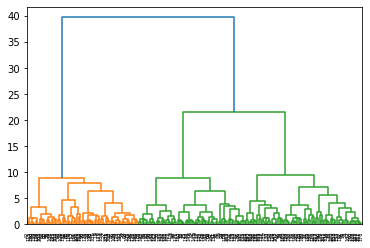

In [36]:
dend = dendrogram(wardlink)

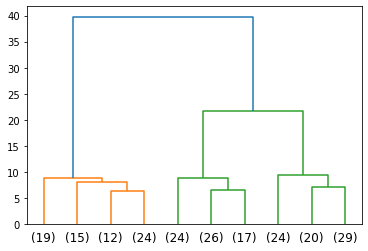

In [37]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10
                 )

In [38]:
from scipy.cluster.hierarchy import fcluster

In [39]:
clusters_1 = fcluster(wardlink, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [40]:
clusters_2 = fcluster(wardlink, 21, criterion='distance')
clusters_2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [41]:
np.array_equal(clusters_1,clusters_2)

True

In [42]:
data_df['Hclusters'] = clusters_1

In [43]:
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hclusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [44]:
data_df.Hclusters.value_counts().sort_index()

1    70
2    67
3    73
Name: Hclusters, dtype: int64

In [45]:
aggdata=data_df.groupby('Hclusters').mean()
aggdata['Freq']=data_df.Hclusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Hclusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [46]:
#from sklearn.cluster import AgglomerativeClustering

In [47]:
#cluster = AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean')
#Cluster_agglo=cluster.fit_predict(data_df)
#print(Cluster_agglo)

In [48]:
#data_df["Agglo_Clusters"]=Cluster_agglo

In [49]:
#data_df.columns

In [50]:
#agglo_data=data_df.groupby('Agglo_Clusters').mean()
#agglo_data['Freq']=data_df.Agglo_Clusters.value_counts().sort_index()
#agglo_data

In [51]:
#data_df.drop('Agglo_Clusters',axis=1,inplace=True)

In [52]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [53]:
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [54]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [55]:
k_means.inertia_

659.1717544870411

In [56]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999995

In [57]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

430.65897315130064

In [58]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

371.301721277542

In [59]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

327.9608240079031

In [60]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

290.5900305968219

In [61]:
wss =[]

In [62]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [63]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 328.52450861920187,
 289.4449389962108,
 265.00033031657654,
 241.41074163527347,
 225.8385136322917,
 207.80865624048099]

In [64]:
a=[1,2,3,4,5,6,7,8,9,10]

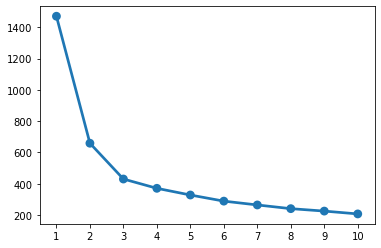

In [65]:
sns.pointplot(a, wss);

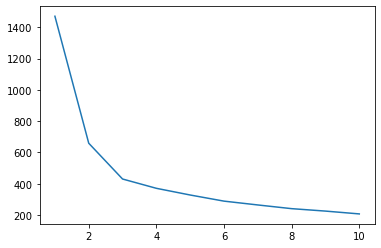

In [66]:
plt.plot(range(1,11), wss);

In [67]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [69]:
silhouette_score(scaled_df,labels,random_state=1)

0.4007270552751298

In [70]:
sil_width = silhouette_samples(scaled_df,labels).min()

In [71]:
sil_width

0.002713089347678376

In [72]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
label = k_means.labels_

In [73]:
silhouette_score(scaled_df,label,random_state=1)

0.32757426605518075

In [74]:
#data_df.drop(['clusters','Agglo_Clusters'],axis=1,inplace=True)
data_df["Clus_kmeans"] = labels
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hclusters,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [75]:
data_df.Clus_kmeans.value_counts().sort_index()

0    72
1    67
2    71
Name: Clus_kmeans, dtype: int64

In [76]:
clust_profile=data_df.groupby('Clus_kmeans').mean()
clust_profile['freq']=data_df.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hclusters,freq
Clus_kmeans,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,71


In [77]:
data_df["sil_width"] = sil_width
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hclusters,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.002713
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.002713
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.002713
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.002713
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.002713


In [78]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678376

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [80]:
df = pd.read_csv("insurance_part2_data-2.csv")

In [81]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [82]:
df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [84]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [85]:
df.duplicated().sum()

139

In [86]:
df.shape

(3000, 10)

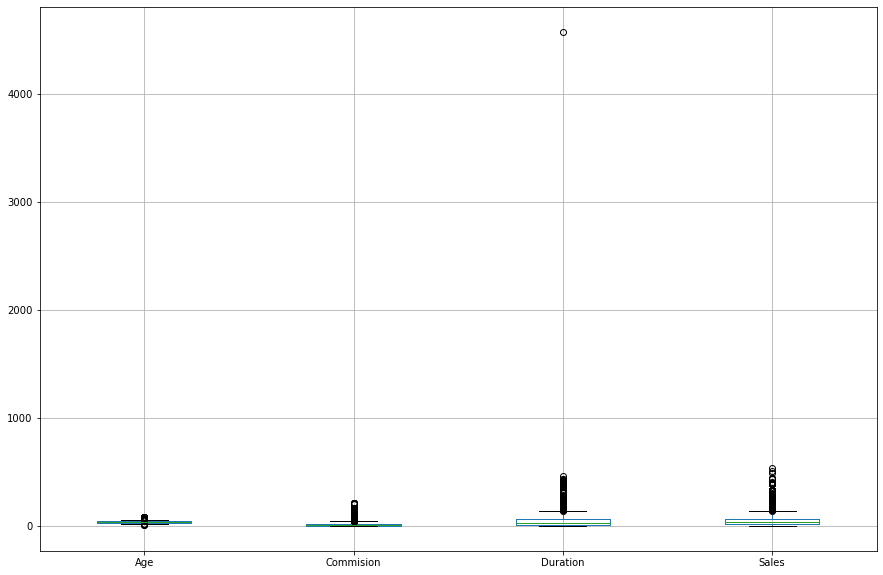

In [87]:
continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
data_plot=df[continuous]

data_plot.boxplot(figsize=(15,10));

Age = 1.149712770495169


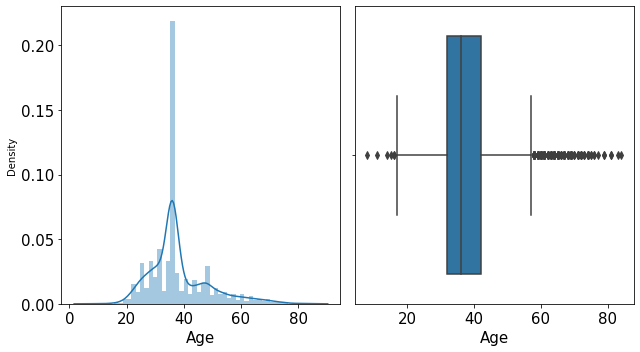

In [88]:
print('Age =',df['Age'].skew())
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(9,5))
sns.distplot(df['Age'],ax=ax1)
ax1.set_xlabel('Age',fontsize=15)
ax1.tick_params(labelsize=15)

sns.boxplot(df['Age'],ax=ax2)
ax2.set_xlabel('Age',fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Commision = 3.148857772356885


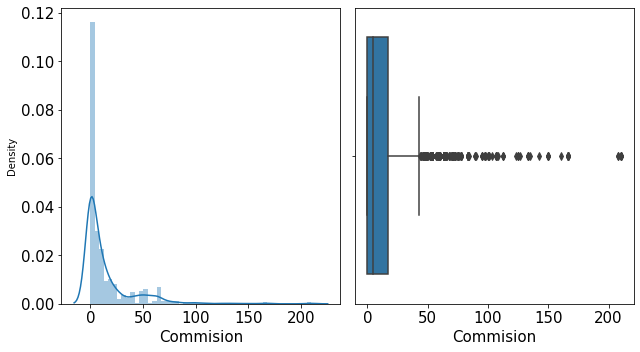

In [89]:
print('Commision =',df['Commision'].skew())
fig,(ax3,ax4)=plt.subplots(1,2,figsize=(9,5))
sns.distplot(df['Commision'],ax=ax3)
ax3.set_xlabel('Commision',fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(df['Commision'],ax=ax4)
ax4.set_xlabel('Commision',fontsize=15)
ax4.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Duration = 13.784681027519602


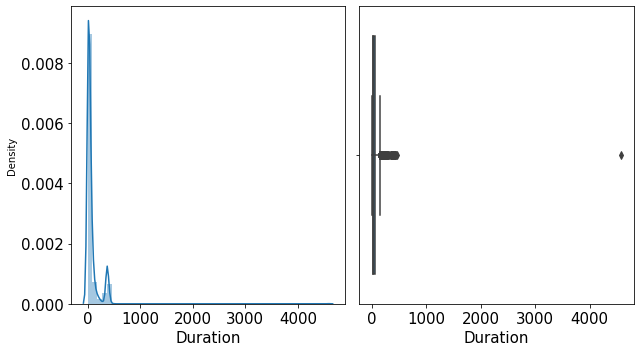

In [90]:
print('Duration =',df['Duration'].skew())
fig,(ax5,ax6)=plt.subplots(1,2,figsize=(9,5))
sns.distplot(df['Duration'],ax=ax5)
ax5.set_xlabel('Duration',fontsize=15)
ax5.tick_params(labelsize=15)

sns.boxplot(df['Duration'],ax=ax6)
ax6.set_xlabel('Duration',fontsize=15)
ax6.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Sales = 2.381148461687274


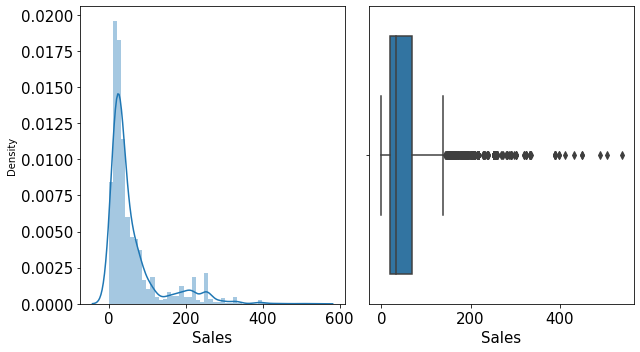

In [91]:
print('Sales =',df['Sales'].skew())
fig,(ax7,ax8)=plt.subplots(1,2,figsize=(9,5))
sns.distplot(df['Sales'],ax=ax7)
ax7.set_xlabel('Sales',fontsize=15)
ax7.tick_params(labelsize=15)

sns.boxplot(df['Sales'],ax=ax8)
ax8.set_xlabel('Sales',fontsize=15)
ax8.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [92]:
pd.value_counts(df['Agency_Code'])

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [93]:
pd.value_counts(df['Type'])

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [94]:
pd.value_counts(df['Claimed'])

No     2076
Yes     924
Name: Claimed, dtype: int64

In [95]:
pd.value_counts(df['Channel'])

Online     2954
Offline      46
Name: Channel, dtype: int64

In [96]:
pd.value_counts(df['Product Name'])

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [97]:
pd.value_counts(df['Destination'])

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

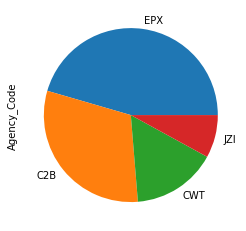

In [98]:
pd.value_counts(df["Agency_Code"]).plot(kind="pie")
plt.show()

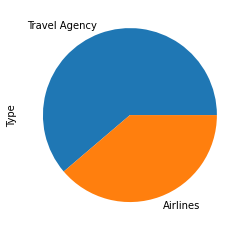

In [99]:
pd.value_counts(df["Type"]).plot(kind="pie")
plt.show()

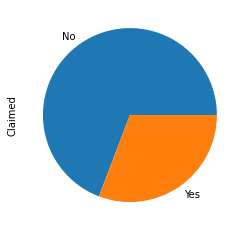

In [100]:
pd.value_counts(df["Claimed"]).plot(kind="pie")
plt.show()

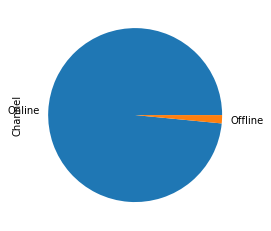

In [101]:
pd.value_counts(df["Channel"]).plot(kind="pie")
plt.show()

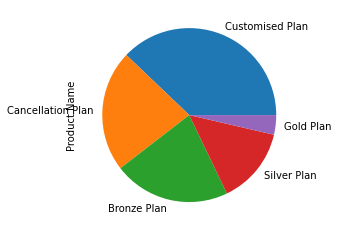

In [102]:
pd.value_counts(df["Product Name"]).plot(kind="pie")
plt.show()

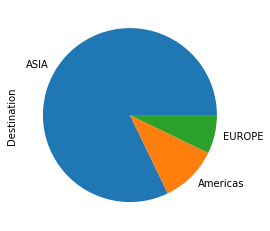

In [103]:
pd.value_counts(df["Destination"]).plot(kind="pie")
plt.show()

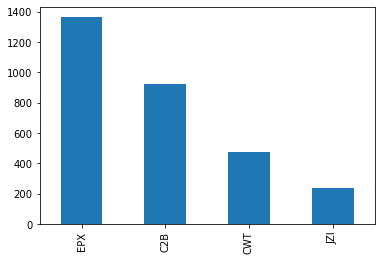

In [104]:
pd.value_counts(df["Agency_Code"]).plot(kind="bar")
plt.show()

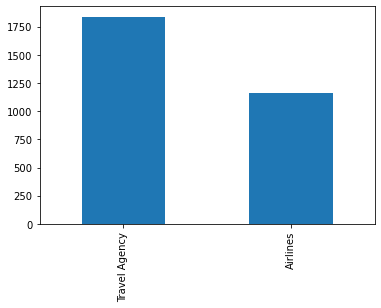

In [105]:
pd.value_counts(df["Type"]).plot(kind="bar")
plt.show()

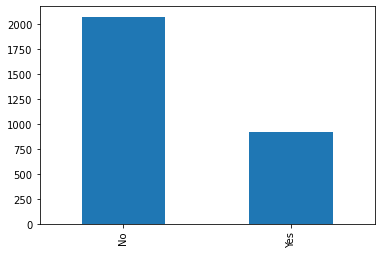

In [106]:
pd.value_counts(df["Claimed"]).plot(kind="bar")
plt.show()

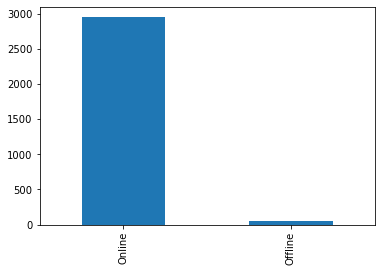

In [107]:
pd.value_counts(df["Channel"]).plot(kind="bar")
plt.show()

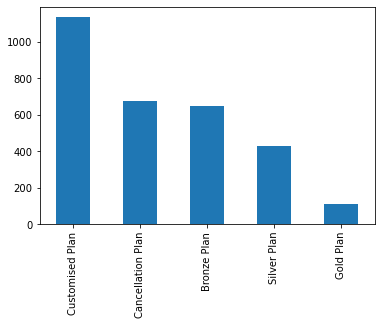

In [108]:
pd.value_counts(df["Product Name"]).plot(kind="bar")
plt.show()

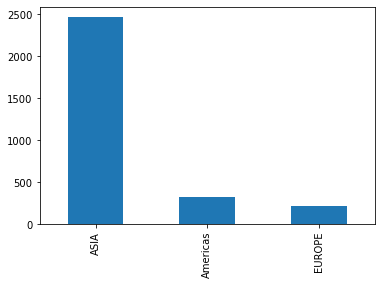

In [109]:
pd.value_counts(df["Destination"]).plot(kind="bar")
plt.show()

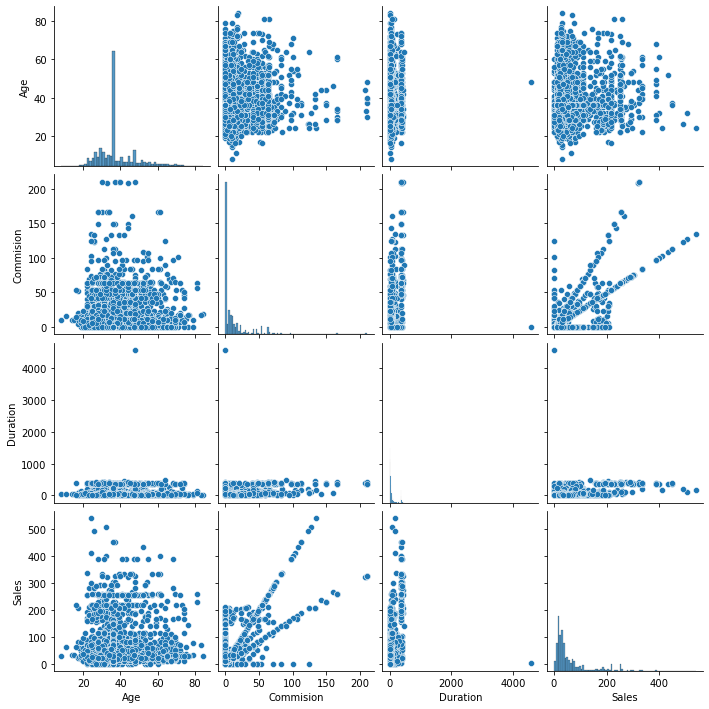

In [110]:
sns.pairplot(df[df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index])
plt.show()

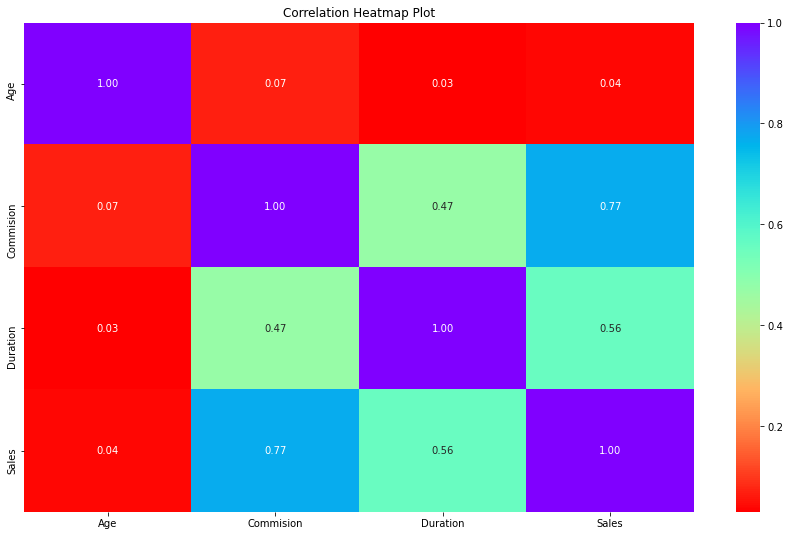

In [111]:
plt.figure(figsize=(15,9))
sns.heatmap(round(df.corr(),2),fmt='.2f',annot=True,cmap='rainbow_r')
plt.title('Correlation Heatmap Plot')
plt.show()

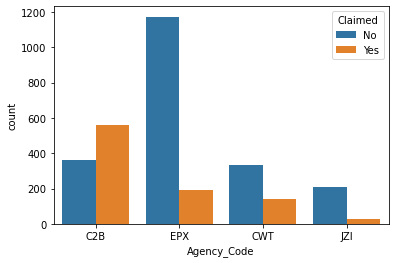

In [112]:
sns.countplot(x='Agency_Code', hue='Claimed', data=df);

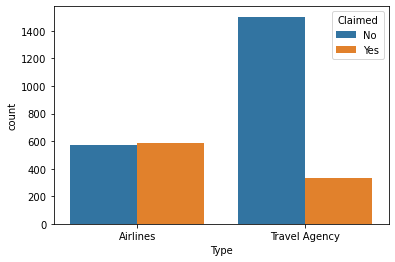

In [113]:
sns.countplot(x='Type', hue='Claimed', data=df);

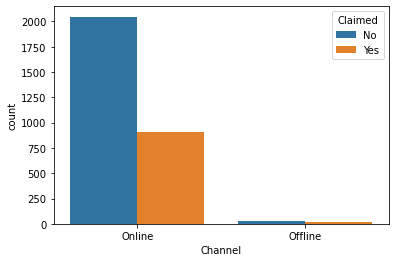

In [114]:
sns.countplot(x='Channel', hue='Claimed', data=df);

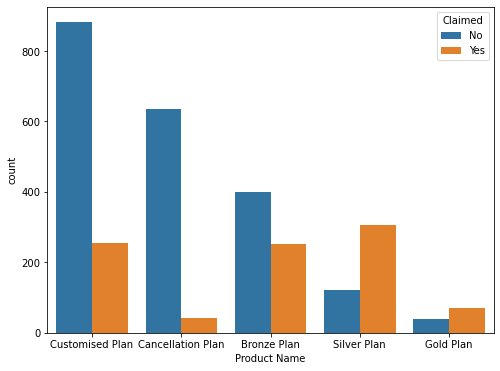

In [115]:
plt.figure(figsize=(8,6))
sns.countplot(x='Product Name', hue='Claimed', data=df);

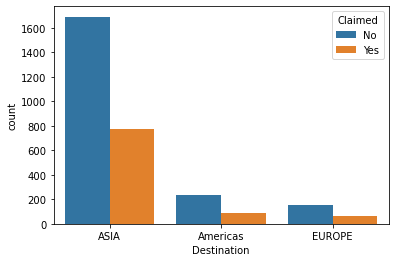

In [116]:
sns.countplot(x='Destination', hue='Claimed', data=df);

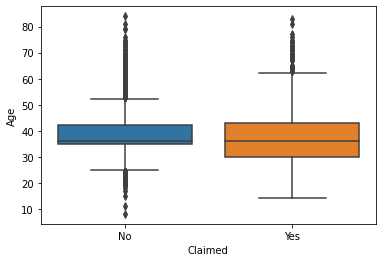

In [117]:
fig_dims = (12, 5)
sns.boxplot(x='Claimed', y='Age', data=df);

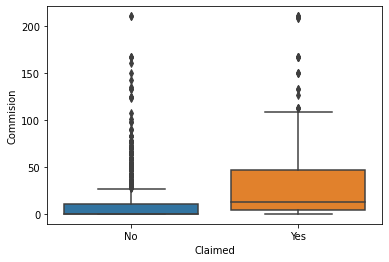

In [118]:
fig_dims = (12, 5)
sns.boxplot(x='Claimed', y='Commision', data=df);

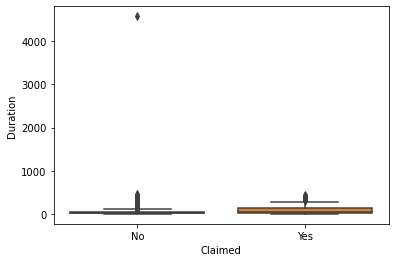

In [119]:
fig_dims = (12, 5)
sns.boxplot(x='Claimed', y='Duration', data=df);

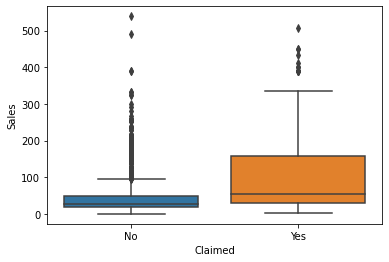

In [120]:
fig_dims = (12, 5)
sns.boxplot(x='Claimed', y='Sales', data=df);

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

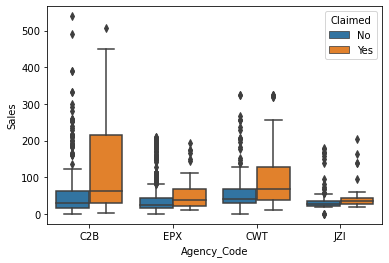

In [121]:
sns.boxplot(data=df,x='Agency_Code',y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

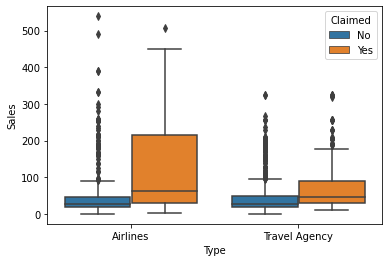

In [122]:
sns.boxplot(data=df,x='Type',y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

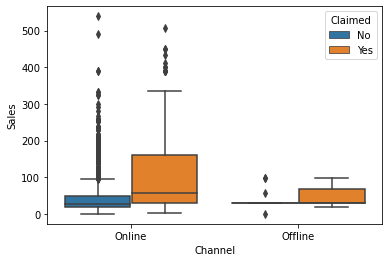

In [123]:
sns.boxplot(data=df,x='Channel',y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

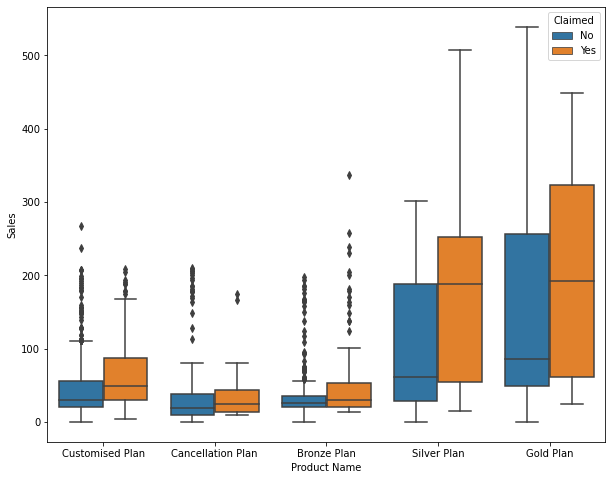

In [124]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Product Name',y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

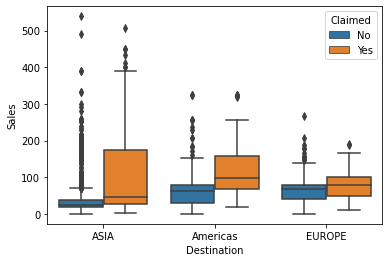

In [125]:
sns.boxplot(data=df,x='Destination',y='Sales',hue='Claimed')

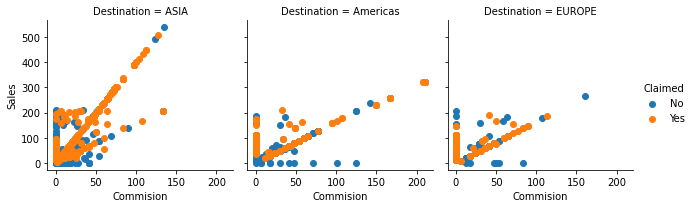

In [126]:
g = sns.FacetGrid(df, col="Destination", hue='Claimed',col_wrap=3, height=3)
g = g.map(plt.scatter, "Commision", 'Sales')
g.add_legend()

In [127]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [129]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [130]:
X = df.drop("Claimed" , axis=1)

y = df.pop("Claimed")

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [132]:
cart_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [133]:
cart_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [134]:
import sklearn.tree as tree
fig, axes = plt.subplots(figsize = (10, 10), dpi = 900)
tree.plot_tree(cart_model);
fig.savefig('decisiontree.png')

In [135]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [138]:
param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [139]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [140]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 25, 'min_samples_split': 60}

In [141]:
best_grid = grid_search.best_estimator_

In [142]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.547342
Sales         0.253935
Product Name  0.069913
Age           0.050733
Duration      0.050709
Commision     0.020597
Type          0.006772
Channel       0.000000
Destination   0.000000


In [143]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [144]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.966667,0.033333
1,0.555556,0.444444
2,0.292035,0.707965
3,0.196078,0.803922
4,0.909774,0.090226


AUC: 0.852


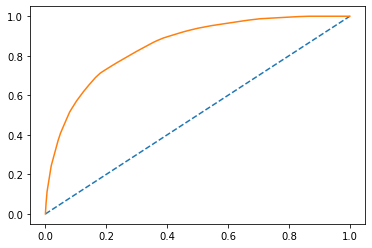

In [145]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.790


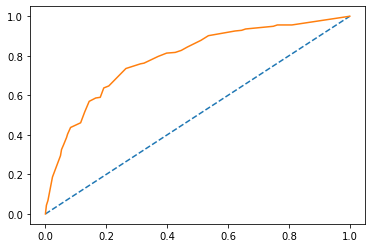

In [146]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [147]:
confusion_matrix(train_labels, ytrain_predict)

array([[1320,  151],
       [ 269,  360]], dtype=int64)

Confusion Matrix for DecisionTreeClassifier model is


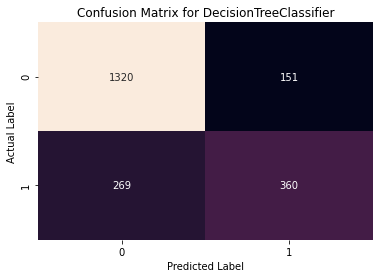

In [148]:
models_names={dt_model:'DecisionTreeClassifier'}
print('Confusion Matrix for {} model is'.format(models_names[dt_model]))
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dt_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [149]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.8

In [150]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.70      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [151]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.57
cart_train_f1  0.63


In [152]:
confusion_matrix(test_labels, ytest_predict)

array([[555,  50],
       [166, 129]], dtype=int64)

Confusion Matrix for DecisionTreeClassifier model is


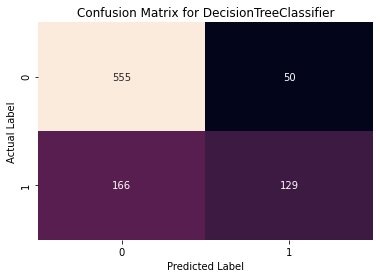

In [153]:
models_names={dt_model:'DecisionTreeClassifier'}
print('Confusion Matrix for {} model is'.format(models_names[dt_model]))
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dt_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [154]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.76

In [155]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [156]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.44
cart_test_f1  0.54


In [157]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [158]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [159]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [160]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [161]:
best_grid = grid_search.best_estimator_

In [162]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

In [163]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.349944
Sales         0.188456
Product Name  0.170146
Commision     0.100971
Duration      0.093409
Age           0.067548
Type          0.020343
Destination   0.008332
Channel       0.000851


In [164]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [165]:
confusion_matrix(train_labels,ytrain_predict)

array([[1335,  136],
       [ 246,  383]], dtype=int64)

Confusion Matrix for RandomForestClassifier model is


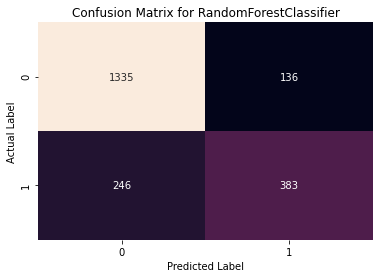

In [166]:
models_names={rfcl:'RandomForestClassifier'}
print('Confusion Matrix for {} model is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [167]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8180952380952381

In [168]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1471
           1       0.74      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [169]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.61
rf_train_f1  0.67


Area under Curve is 0.8744205676464645


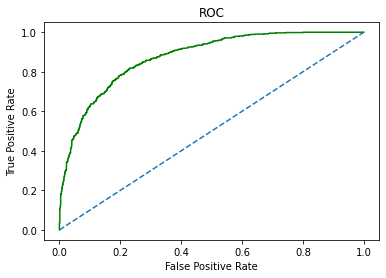

In [170]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [171]:
confusion_matrix(test_labels,ytest_predict)

array([[554,  51],
       [155, 140]], dtype=int64)

Confusion Matrix for RandomForestClassifier model is


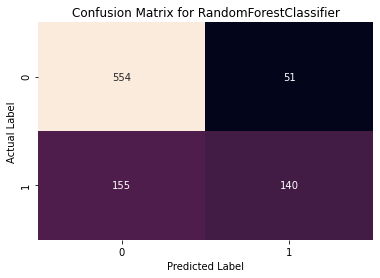

In [172]:
models_names={rfcl:'RandomForestClassifier'}
print('Confusion Matrix for {} model is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [173]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7711111111111111

In [174]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [175]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.47
rf_test_f1  0.58


Area under Curve is 0.8226586356632581


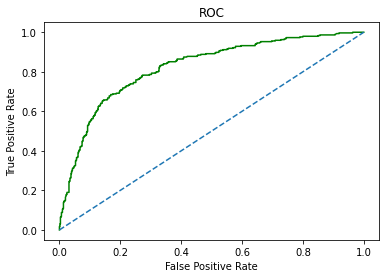

In [176]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [177]:
param_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [178]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [179]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

In [180]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [181]:
confusion_matrix(train_labels,ytrain_predict)

array([[1289,  182],
       [ 262,  367]], dtype=int64)

Confusion Matrix for ArtificialNeuralNetworks model is


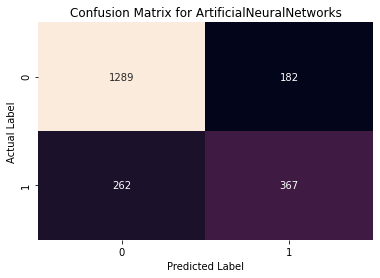

In [182]:
models_names={nncl:'ArtificialNeuralNetworks'}
print('Confusion Matrix for {} model is'.format(models_names[nncl]))
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[nncl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [183]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7885714285714286

In [184]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [185]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.58
nn_train_f1  0.62


Area under Curve is 0.8158261632688794


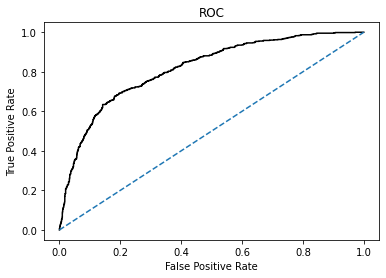

In [186]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [187]:
confusion_matrix(test_labels,ytest_predict)

array([[547,  58],
       [154, 141]], dtype=int64)

Confusion Matrix for ArtificialNeuralNetworks model is


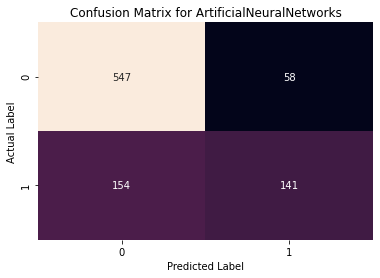

In [188]:
models_names={nncl:'ArtificialNeuralNetworks'}
print('Confusion Matrix for {} model is'.format(models_names[nncl]))
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[nncl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [189]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7644444444444445

In [190]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [191]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.48
nn_test_f1  0.57


Area under Curve is 0.7827903067656534


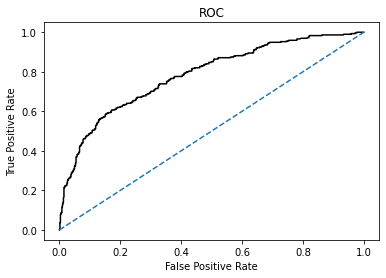

In [192]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [193]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

In [194]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.76,0.82,0.77,0.79,0.76
AUC,0.85,0.79,0.87,0.82,0.82,0.78
Recall,0.57,0.44,0.61,0.47,0.58,0.48
Precision,0.70,0.72,0.74,0.73,0.67,0.71
F1 Score,0.63,0.54,0.67,0.58,0.62,0.57


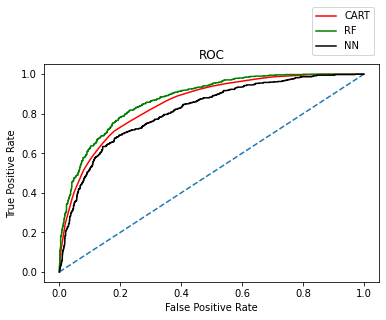

In [195]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

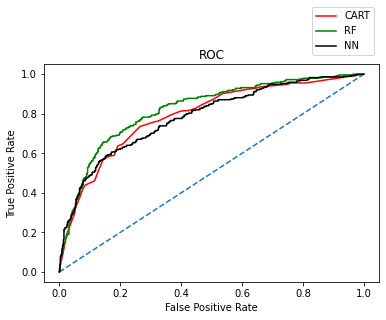

In [196]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')